#### Project 2

##### Bullet Point 1: Analyse CO2 vs Temperature Anomaly from 800kyrs – present

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Section to load in Data. Not loading in the data correctly. I need to remove the headings from the data as it is loading them as headings. I need to remove four headings. Update-Headings removed and results shown.

I decided to remove the columns needed and create seperate excel files one with C02 data and ages and one with Temp Data.

In [ ]:
df = pd.read_excel('C02 Data.xlsx')
df.head()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['EDC3_gas_a (yr)'], df['CO2 (ppmv)'], marker='o', linestyle='-')
plt.xlabel('Age of Gas (years)')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title('CO2 Concentration Over Time')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Temp Data.xlsx')
df.head()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Temp Age'], df['Temp'], marker='o', linestyle='-')
plt.xlabel('Temperature Age')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')
plt.grid(True)
plt.show()

Further plotting of both:

Analysis: 

##### Bullet Point 2

Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)

After a number of attempts to load the data set from: https://www1.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt, I decided to try and skip the inital lines from the dataest. Before this I have tried to import it directly and python would not load the data correctly. I also tried, in a number of ways, to import the data into excel and it was putting the data into a single column and despite a number of efforts to import the data and transform it, it would not work. Finally, upon research I decided to try and use the orginal file but skip the opening introduction text until i reached the headings. Here I used 'skiprows=152' and printed the information. Once again, I had to keep going until I found the correct number (152). This so far has made the data usable. Please find the used code below, followed by the references. Much of this was also taught in the lectures throughout this course.

In [ ]:
import pandas as pd

data_from_site = "https://www1.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt"

df = pd.read_fwf(data_from_site, skiprows=152, header=None)

print(df.head())

Data is messy and not being imported correctly. I placed a tab delimeter on it but I need to change the data source as it does not seem to be correct importing. Not Working

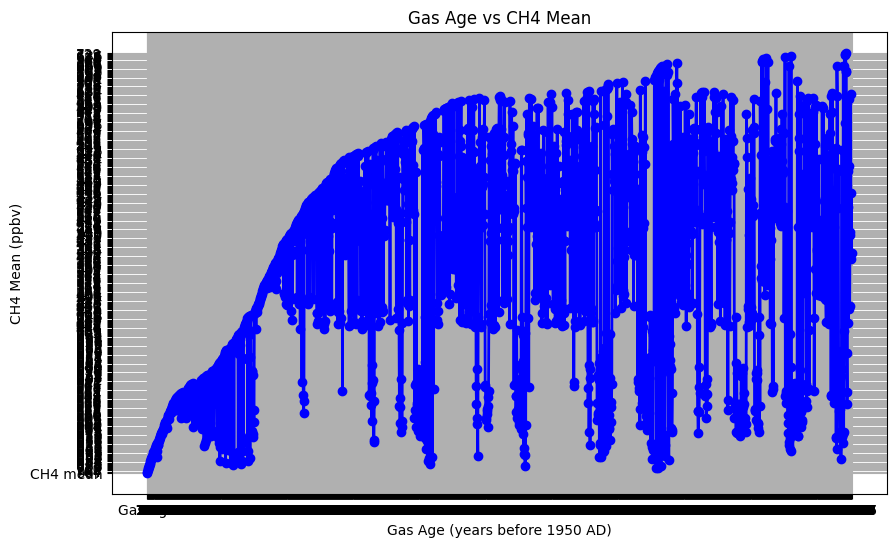

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

data_from_site = "https://www1.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt"

df = pd.read_fwf(data_from_site, skiprows=152, header=None)

df.columns = ['depth', 'gas_age', 'ch4_mean', 'uncertainty', 'laboratory']
#creating a dataframe
info_needed = df[['gas_age', 'ch4_mean']]
#Dataframe to csv #https://saturncloud.io/blog/how-to-remove-index-column-while-saving-csv-in-pandas/#:~:text=By%20default%2C%20pandas%20saves%20the,and%20setting%20it%20to%20False%20.
info_needed.to_csv('gas_age_ch4_data.csv', index=False)

# Plott
plt.figure(figsize=(10, 6))
plt.plot(info_needed['gas_age'], info_needed['ch4_mean'], marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Gas Age vs CH4 Mean')
plt.xlabel('Gas Age (pre-1950)')
plt.ylabel('CH4 Mean')
plt.grid(True)
plt.show()


References: 

https://www.listendata.com/2017/02/import-data-in-python.html#:~:text=You%20don't%20need%20to,CSV%20files%20stored%20in%20URL)


https://stackoverflow.com/questions/49583256/skip-lines-in-a-text-file.&text=By%20specifying%20nrows%3D%20and%20usecols,number%20of%20rows%20and%20columns.  

Bullet point 3

Examine Irish context

Same code used. Grid added.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data using pandas, skip the header rows
url = "https://www1.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt"
df = pd.read_fwf(url, skiprows=66, header=None)

# Assign column names based on the number of columns
num_columns = len(df.columns)
column_names = [f'Column {i+1}' for i in range(num_columns)]
df.columns = column_names

# Extracting relevant columns (Gas Age and CH4 mean)
gas_age = df['Column 2']
ch4_mean = df['Column 3']

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(gas_age, ch4_mean, label='CH4 mean', color='green')
plt.title('CH4 Mean Over Gas Age')
plt.xlabel('Gas Age (EDC3 gas age, years before 1950 AD)')
plt.ylabel('CH4 mean (ppbv)')
plt.legend()
plt.grid(True)
plt.show()


References used: https://repository.library.noaa.gov/view/noaa/48993/noaa_48993_DS1.pdf

https://towardsdatascience.com/weather-forecasting-with-machine-learning-using-python-55e90c346647

Bullet Point 4

Fuse and analyse data from various data sources and format fused data set as a pandas
dataframe and export to csv and json formats


References: 

https://www.w3schools.com/python/pandas/ref_df_merge.asp 

https://pandas.pydata.org/docs/user_guide/merging.html

#### Bullet point 5

For all of the above variables, analyse the data, the trends and the relationships between
them (temporal leads/lags/frequency analysis).

#### Bullet point 6

Predict global temperature anomaly over next few decades (synthesise data) and compare to
published climate models if atmospheric CO2 trends continue


#### Bullet Point 7 

Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)